# Sales Prediction using ML

### import libraries and Dataset load

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("dataset/Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [76]:
df.shape

(8523, 12)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [78]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [79]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [80]:
df.duplicated().value_counts()

False    8523
Name: count, dtype: int64

In [81]:
df.duplicated().sum()

0

In [82]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [83]:
df['Item_Fat_Content'].unique().tolist()

['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

In [84]:
df['Outlet_Size'].unique().tolist()

['Medium', nan, 'High', 'Small']

In [85]:
df['Outlet_Location_Type'].unique().tolist()

['Tier 1', 'Tier 3', 'Tier 2']

In [86]:
df['Outlet_Type'].unique().tolist()

['Supermarket Type1',
 'Supermarket Type2',
 'Grocery Store',
 'Supermarket Type3']

In [87]:
new_df = df[['Outlet_Size', 'Outlet_Type', 'Outlet_Location_Type']]
new_df.head()

,Outlet_Size,Outlet_Type,Outlet_Location_Type
0,Medium,Supermarket Type1,Tier 1
1,Medium,Supermarket Type2,Tier 3
2,Medium,Supermarket Type1,Tier 1
3,NaN,Grocery Store,Tier 3
4,High,Supermarket Type1,Tier 3


# Data Cleaning and Preprocessing

#### filling missing values
    item_weight(filling with mean)
    outlet_Type(filling with mode)

In [88]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [89]:
value_counts = df['Outlet_Size'].value_counts()
value_counts

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [90]:
df['Outlet_Size'].isnull().sum()
#df.info()

2410

In [91]:
# Predictive Imputation Based on Related Features
# This approach involves predicting Outlet_Size based on related features (Outlet_Type and Outlet_Location_Type) using ml model.
# Separate data with and without missing Outlet_Size

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
# Step 1: Create a Separate deep copies of the subsets 
data_not_missing = df[df['Outlet_Size'].notna()].copy()
data_missing = df[df['Outlet_Size'].isna()].copy()

# Encode categorical variables
encoder = LabelEncoder()

# Step 2: Encode Categorical Variables
data_not_missing['Outlet_Type'] = encoder.fit_transform(data_not_missing['Outlet_Type'])
data_not_missing['Outlet_Location_Type'] = encoder.fit_transform(data_not_missing['Outlet_Location_Type'])

data_missing['Outlet_Type'] = encoder.fit_transform(data_missing['Outlet_Type'])
data_missing['Outlet_Location_Type'] = encoder.fit_transform(data_missing['Outlet_Location_Type'])


In [94]:
# Check unique values after encoding
print(data_not_missing['Outlet_Type'].unique())
print(data_not_missing['Outlet_Location_Type'].unique())

[1 2 3 0]
[0 2 1]


In [95]:
# Step 3: Train a Model
from sklearn.ensemble import RandomForestClassifier

# Define features and target
X_train = data_not_missing[['Outlet_Type', 'Outlet_Location_Type']]
y_train = data_not_missing['Outlet_Size']

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [96]:
#Step 4: Predict Missing Values
# Predict Outlet_Size for missing rows
X_missing = data_missing[['Outlet_Type', 'Outlet_Location_Type']]
predicted_sizes = rf_model.predict(X_missing)

# Impute the predicted values back into the dataset
df.loc[df['Outlet_Size'].isna(), 'Outlet_Size'] = predicted_sizes

In [97]:
# Step 5. Verify Imputation
# Distribution of Outlet_Size after imputation
print(df['Outlet_Size'].value_counts())
print(df.info())

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(

# Data Visualizations

### 1. Data Distribution

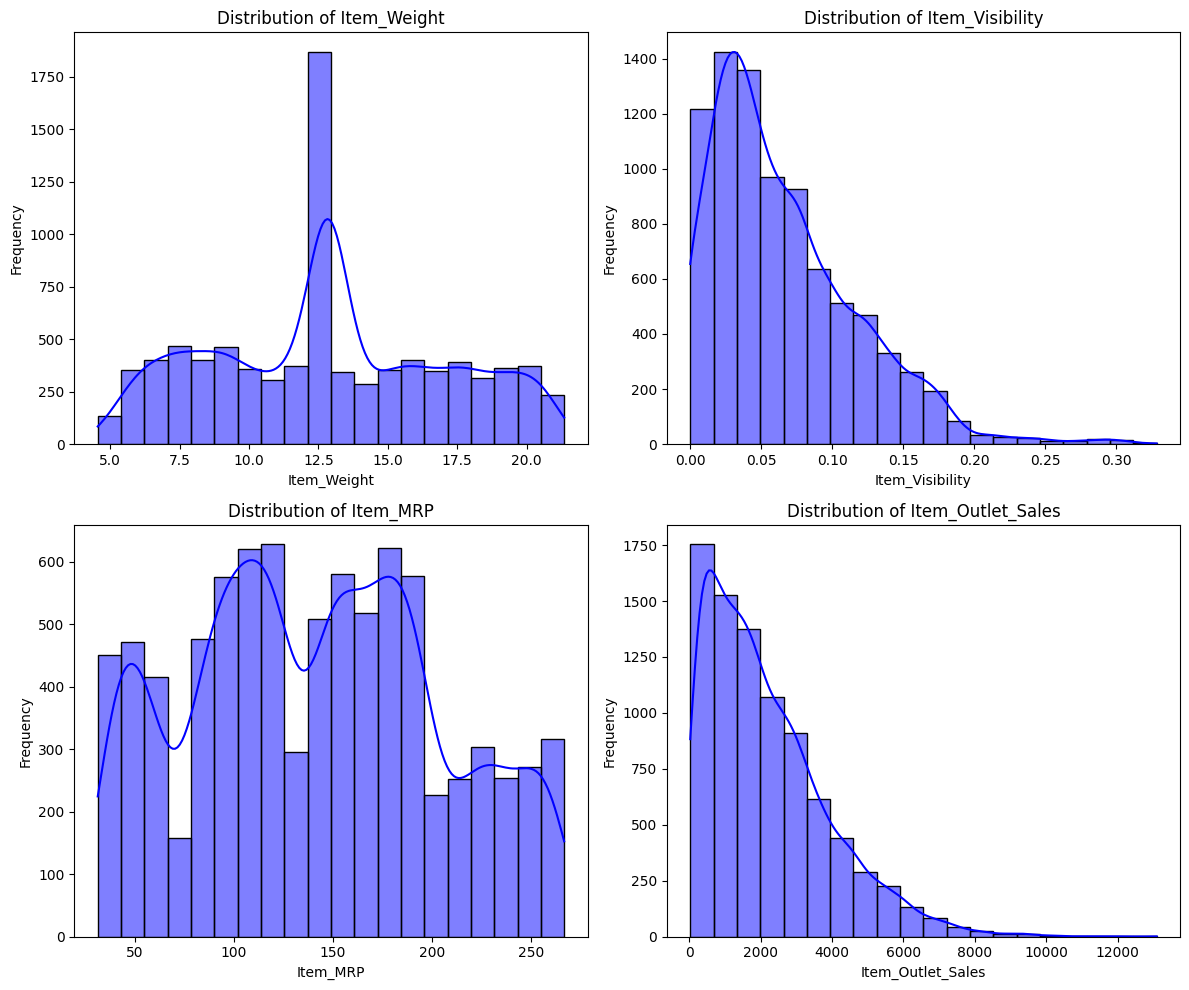

In [98]:
# subplots for histograms of numeric features (Item_Weight, Item_Visibility, Item_MRP, Item_Outlet_Sales)
numeric_features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\814059154.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='Set2')


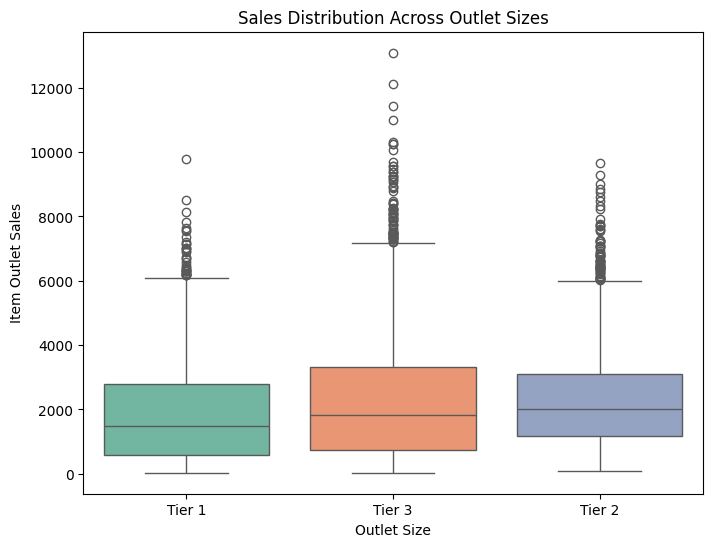

In [99]:
# Box plot: Outlet_Location_Type vs Item Outlet Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.title('Sales Distribution Across Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\367990003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='Set2')


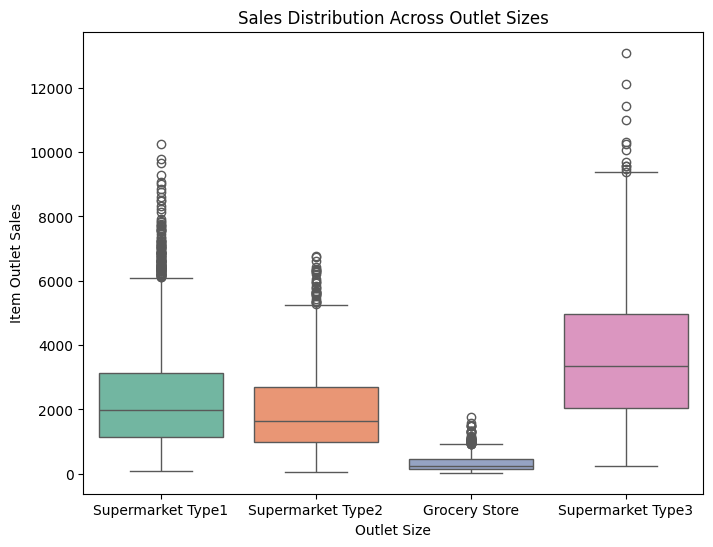

In [100]:
# Box plot: Outlet_Type vs Item Outlet Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.title('Sales Distribution Across Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

### 2. Feature Relationships

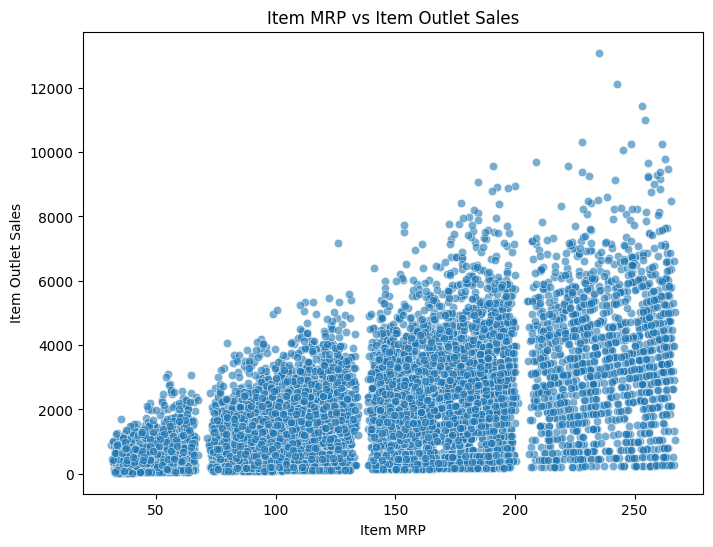

In [101]:
# Scatter plot: Item MRP vs Item Outlet Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Item_MRP'], y=df['Item_Outlet_Sales'], alpha=0.6)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

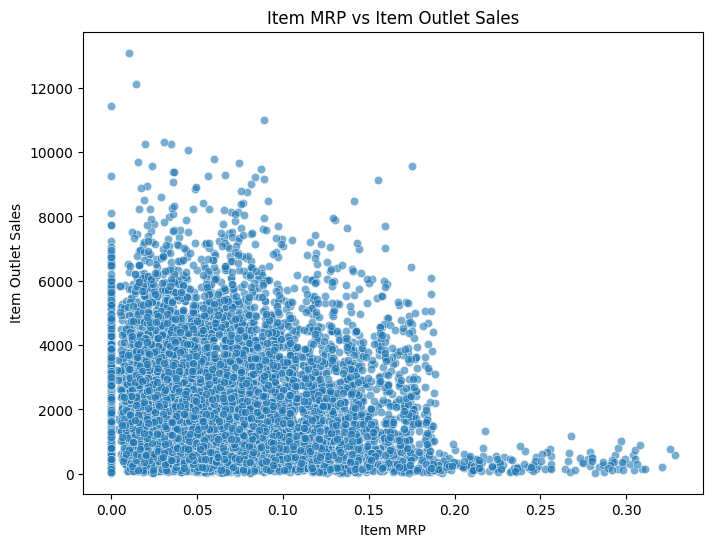

In [102]:

# Scatter plot: Item_Visibility vs. Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Item_Visibility'], y=df['Item_Outlet_Sales'], alpha=0.6)
plt.title('Item MRP vs Item Outlet Sales')
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')
plt.show()

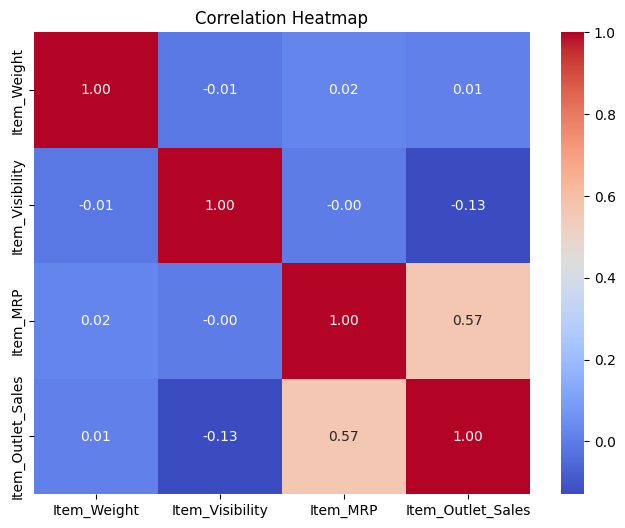

In [103]:
# Compute the correlation matrix for numeric features
correlation_matrix = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']].corr()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 3. Categorical Analysis 

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\3778972643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet_Establishment_Year', data=df, palette='viridis')


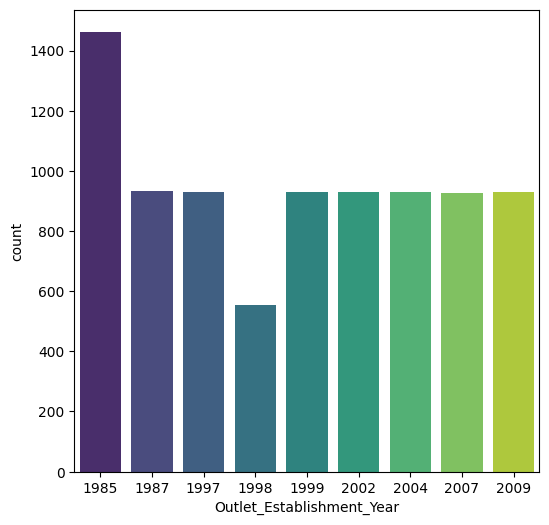

In [104]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='viridis')
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\1514629835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')


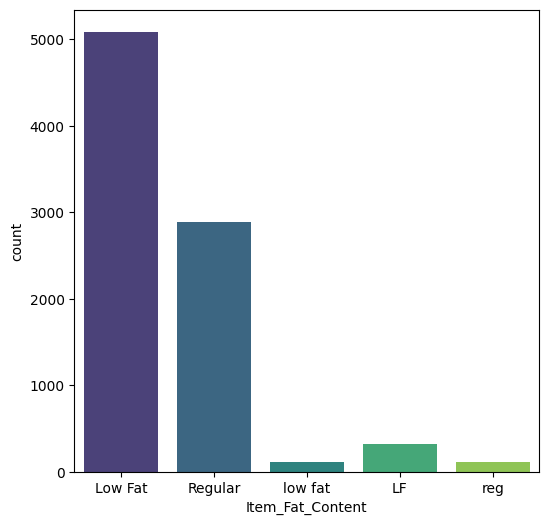

In [105]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\2131355142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item_Type', data=df, palette='viridis')


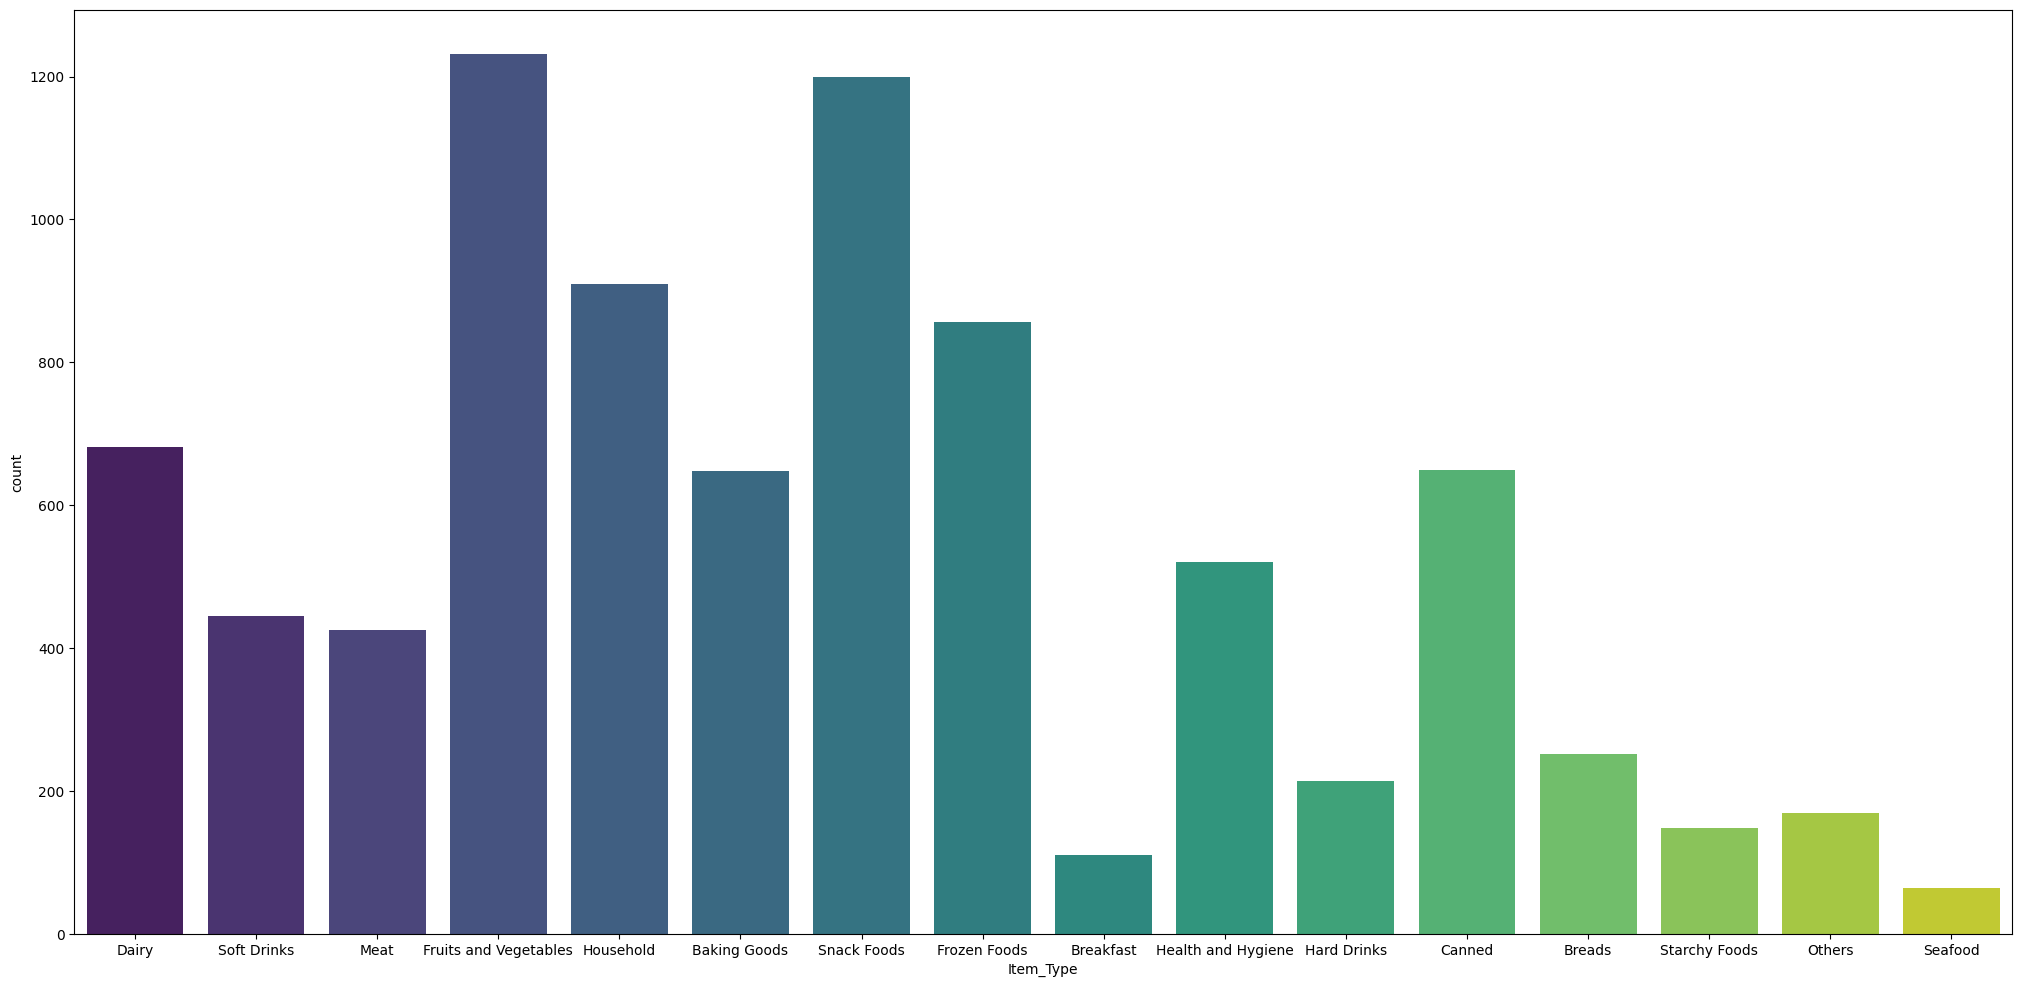

In [106]:
# Item_Type column
plt.figure(figsize=(25,12))
sns.countplot(x='Item_Type', data=df, palette='viridis')
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\484862526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='viridis')


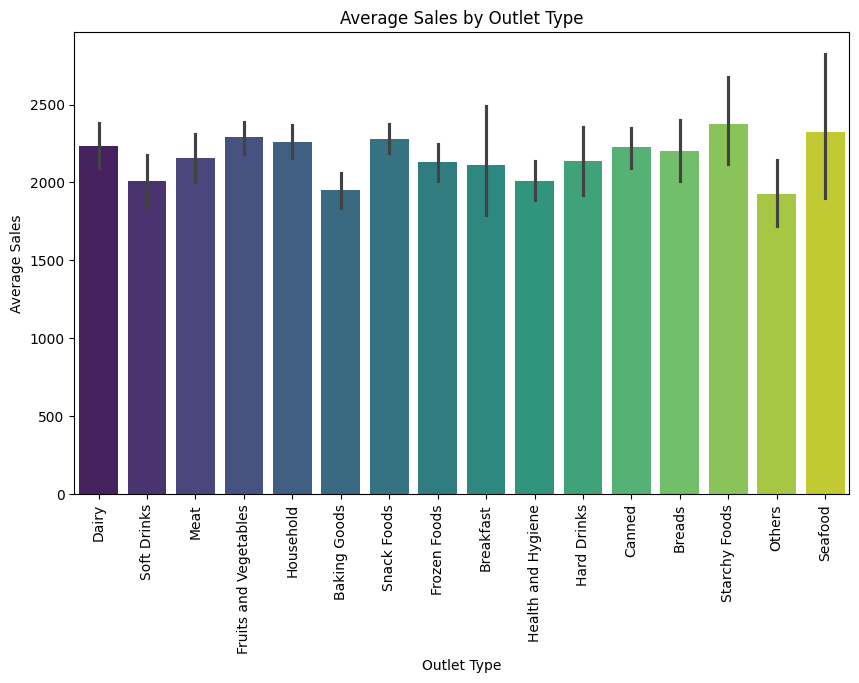

In [107]:
# Bar plot: Outlet Type vs Average Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\2681063148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')


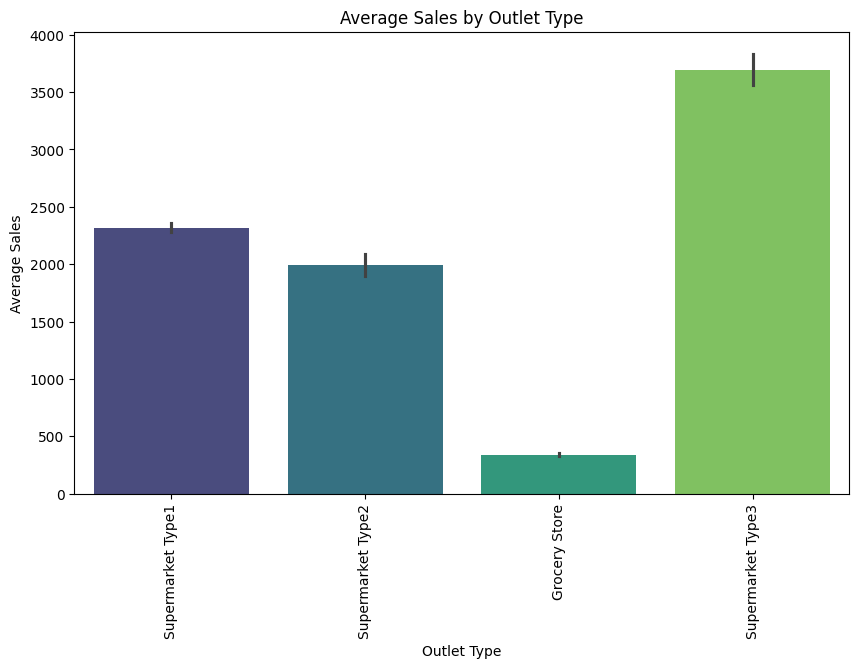

In [108]:
# Bar plot: Outlet Type vs Total Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')  
plt.title('Average Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\2568363342.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette='pastel')


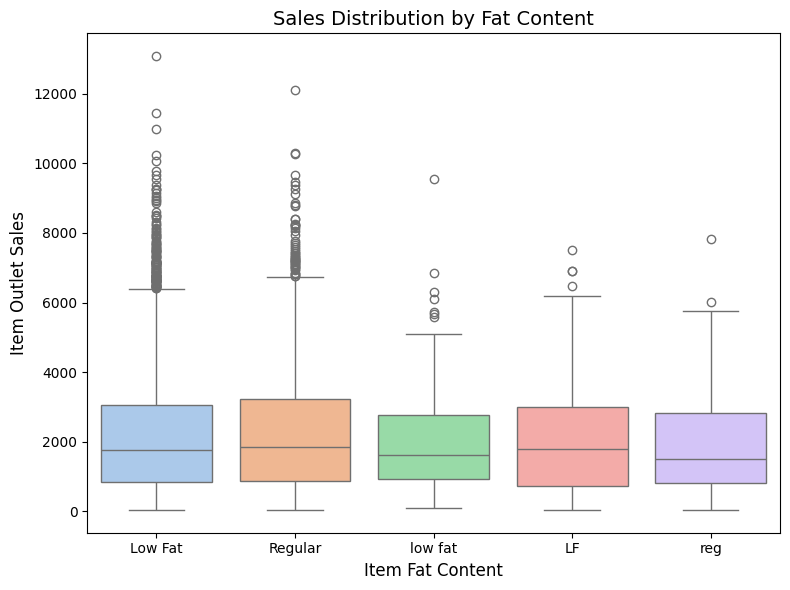

In [109]:
# Box plot: Item_Fat_Content vs Item_Outlet_Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, palette='pastel')
plt.title('Sales Distribution by Fat Content', fontsize=14)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Item Outlet Sales', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\997604564.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='Set2')


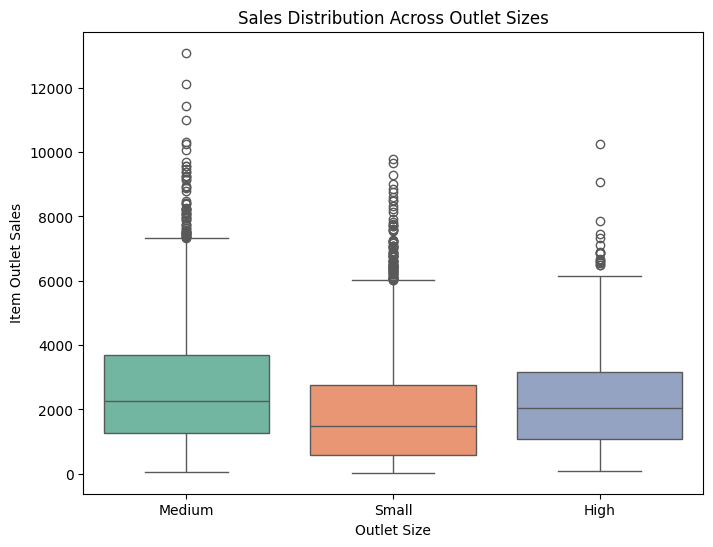

In [110]:
# Box plot: Outlet Size vs Item Outlet Sales
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df, palette='Set2')
plt.title('Sales Distribution Across Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

### 4. Outlet-Specific Analysis

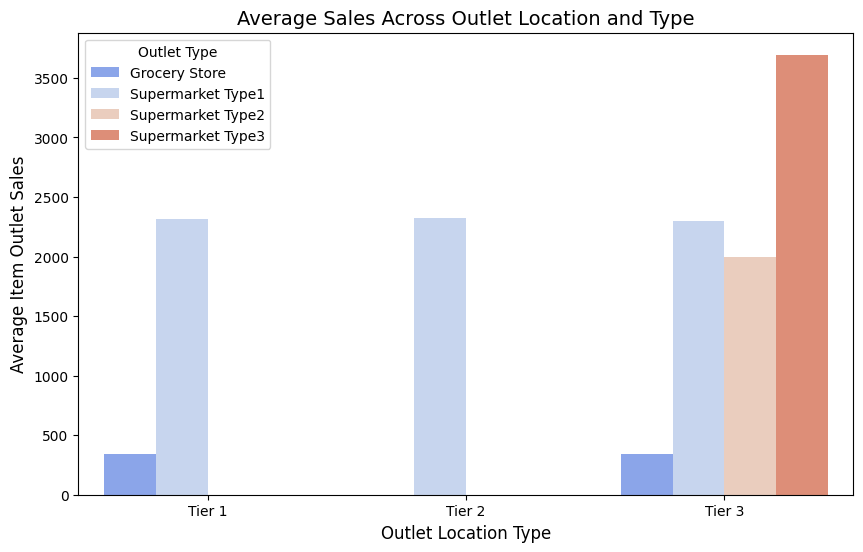

In [111]:
# Grouping and calculating average sales
grouped_data = df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].mean().reset_index()

# Plotting the grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Outlet_Location_Type', 
    y='Item_Outlet_Sales', 
    hue='Outlet_Type', 
    data=grouped_data, 
    palette='coolwarm'
)
plt.title('Average Sales Across Outlet Location and Type', fontsize=14)
plt.xlabel('Outlet Location Type', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.legend(title='Outlet Type', fontsize=10)
plt.show()

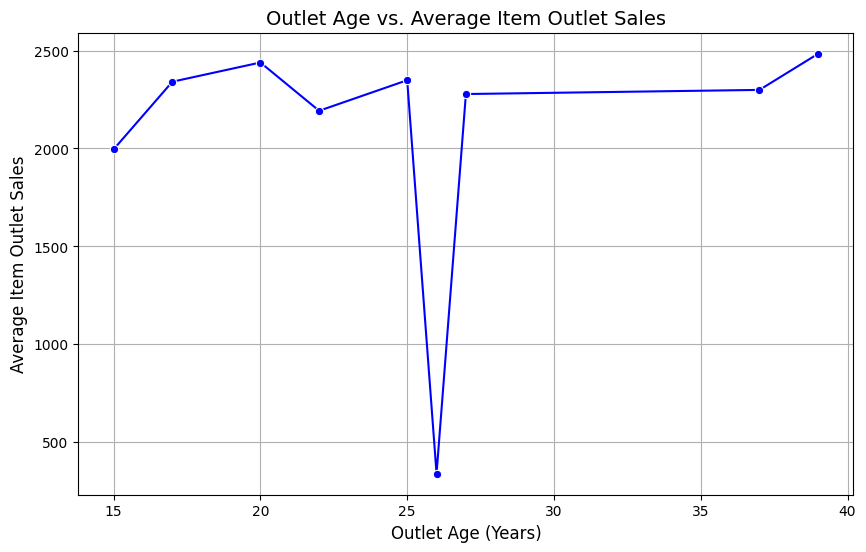

In [112]:
# Calculating outlet age
current_year = 2024  # Replace with the current year
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

# Grouping and calculating average sales by outlet age
age_sales_data = df.groupby('Outlet_Age')['Item_Outlet_Sales'].mean().reset_index()

# Plotting the time-based trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet_Age', y='Item_Outlet_Sales', data=age_sales_data, marker='o', color='blue')
plt.title('Outlet Age vs. Average Item Outlet Sales', fontsize=14)
plt.xlabel('Outlet Age (Years)', fontsize=12)
plt.ylabel('Average Item Outlet Sales', fontsize=12)
plt.grid()
plt.show()

# Feature Engineering

In [113]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37


In [114]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,26.168133
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,15.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,20.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,25.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,37.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,39.000000


In [115]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [116]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [117]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [118]:
(df['Item_Visibility'] == 0).sum()

526

In [119]:
# Replace zero values with group-wise mean based on Item_Type
df['Item_Visibility'] = df.groupby('Item_Type')['Item_Visibility'].transform(
    lambda x: x.replace(0, x.mean())
)

In [120]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070208,140.992782,1997.831867,2181.288914,26.168133
std,4.226124,0.048754,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,15.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,20.000000
50%,12.857645,0.061322,143.012800,1999.000000,1794.331000,25.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,37.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,39.000000


# Normalize/Scale Numeric Features

In [121]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()

# Apply Min-Max scaling to selected features
df[['Item_Weight', 'Item_MRP', 'Item_Visibility']] = min_max_scaler.fit_transform(
    df[['Item_Weight', 'Item_MRP', 'Item_Visibility']]
)

### Handle Outliers

In [123]:
# Calculate the IQR for Item_Outlet_Sales
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers to the bounds (optional, can also be removed)
df['Item_Outlet_Sales'] = df['Item_Outlet_Sales'].clip(lower=lower_bound, upper=upper_bound)

In [124]:
# Calculate the IQR for Item_Outlet_Sales
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers to the bounds (optional, can also be removed)
df['Item_Visibility'] = df['Item_Visibility'].clip(lower=lower_bound, upper=upper_bound)

In [125]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,0.282525,Low Fat,0.038399,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,0.081274,Regular,0.048346,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15
2,FDN15,0.770765,Low Fat,0.040593,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25
3,FDX07,0.871986,Regular,0.199923,Fruits and Vegetables,0.640093,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26
4,NCD19,0.260494,Low Fat,0.177785,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,Low Fat,0.163812,Snack Foods,0.777729,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,37
8519,FDS36,0.227746,Regular,0.133638,Baking Goods,0.326263,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,22
8520,NCJ29,0.359929,Low Fat,0.097321,Health and Hygiene,0.228492,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,20
8521,FDN46,0.158083,Regular,0.436080,Snack Foods,0.304939,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,15


C:\Users\Hamza\AppData\Local\Temp\ipykernel_17296\2408598900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Item_Visibility'], palette='Set2')


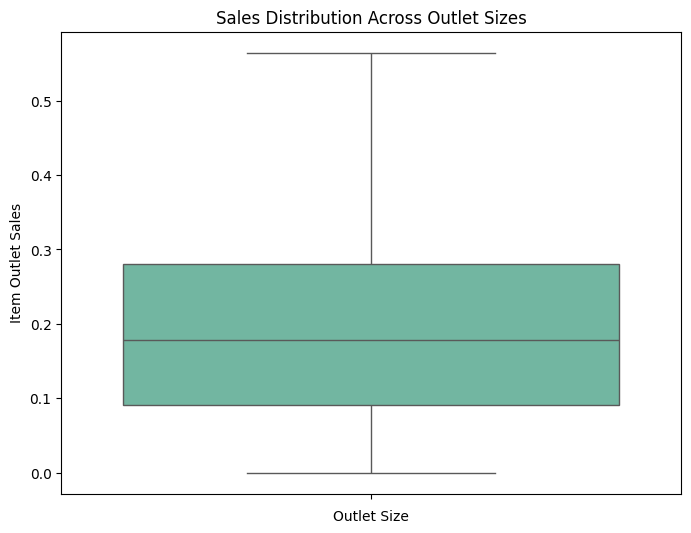

In [126]:
# Box plot: Outlet Size vs Item Outlet Sales
plt.figure(figsize=(8, 6))
sns.boxplot(df['Item_Visibility'], palette='Set2')
plt.title('Sales Distribution Across Outlet Sizes')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

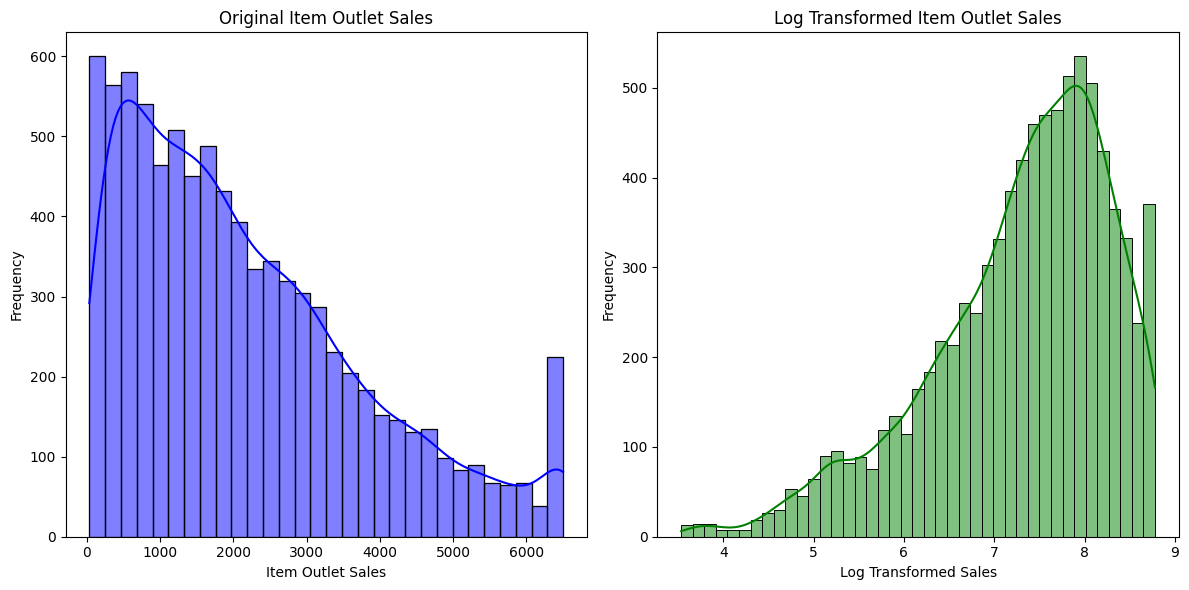

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Apply log transformation to Item_Outlet_Sales
df['Log_Item_Outlet_Sales'] = np.log1p(df['Item_Outlet_Sales'])

# Create subplots to compare the original and log-transformed data
plt.figure(figsize=(12, 6))

# Plot the original Item_Outlet_Sales
plt.subplot(1, 2, 1)
sns.histplot(df['Item_Outlet_Sales'], kde=True, color='blue')
plt.title('Original Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Frequency')

# Plot the log-transformed Item_Outlet_Sales
plt.subplot(1, 2, 2)
sns.histplot(df['Log_Item_Outlet_Sales'], kde=True, color='green')
plt.title('Log Transformed Item Outlet Sales')
plt.xlabel('Log Transformed Sales')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


In [132]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Log_Item_Outlet_Sales
0,FDA15,0.282525,Low Fat,0.038399,Dairy,0.927507,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,8.225808
1,DRC01,0.081274,Regular,0.048346,Soft Drinks,0.072068,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,6.096776
2,FDN15,0.770765,Low Fat,0.040593,Meat,0.468288,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,7.648868
3,FDX07,0.871986,Regular,0.199923,Fruits and Vegetables,0.640093,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,26,6.597664
4,NCD19,0.260494,Low Fat,0.177785,Household,0.095805,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,6.903451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,0.137541,Low Fat,0.163812,Snack Foods,0.777729,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,37,7.929984
8519,FDS36,0.227746,Regular,0.133638,Baking Goods,0.326263,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,22,6.310436
8520,NCJ29,0.359929,Low Fat,0.097321,Health and Hygiene,0.228492,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,20,7.085159
8521,FDN46,0.158083,Regular,0.436080,Snack Foods,0.304939,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,15,7.521100


# Label Encoding

In [136]:
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [138]:
df[['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0,4,1,0,1
1,1,14,1,2,2
2,0,10,1,0,1
3,1,6,2,2,0
4,0,9,0,2,1


# Model Training

**Target Variable**
- Log_Item_Outlet_Sales (transformed sales value)
 
**Numeric Features**
- Item_Weight (weight of the item)
- Item_Visibility (visibility of the item in the outlet)
- Item_MRP (maximum retail price of the item)
- Outlet_Age (age of the outlet)

**Categorical Features**
- Item_Fat_Content: ('Low Fat', 'Regular')
- Item_Type: ('Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood')
- Outlet_Size: ('Medium', 'High', 'Small')
- Outlet_Location_Type: ('Tier 1', 'Tier 3', 'Tier 2')
- Outlet_Type: ('Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3')

In [216]:
df['Item_Type'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [217]:
df['Item_Fat_Content'].unique()

array([0, 1])

In [218]:
df['Outlet_Size'].unique()

array([1, 2, 0])

In [219]:
df['Outlet_Location_Type'].unique()

array([0, 2, 1])

In [220]:
df['Outlet_Type'].unique()

array([1, 2, 0, 3])

In [ ]:
features = [
    'Item_Weight', 
    'Item_Visibility', 
    'Item_MRP', 
    'Outlet_Age', 
    'Item_Fat_Content', 
    'Item_Type', 
    'Outlet_Size', 
    'Outlet_Location_Type', 
    'Outlet_Type'
]

# Target Variable:
target = 'Log_Item_Outlet_Sales'

In [139]:
# Dropping multiple columns
X = df.drop(columns=['Item_Outlet_Sales', 'Log_Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])

In [141]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0.282525,0,0.038399,4,0.927507,1,0,1,25
1,0.081274,1,0.048346,14,0.072068,1,2,2,15
2,0.770765,0,0.040593,10,0.468288,1,0,1,25
3,0.871986,1,0.199923,6,0.640093,2,2,0,26
4,0.260494,0,0.177785,9,0.095805,0,2,1,37


In [143]:
y = df['Log_Item_Outlet_Sales']

In [145]:
y.head()

0    8.225808
1    6.096776
2    7.648868
3    6.597664
4    6.903451
Name: Log_Item_Outlet_Sales, dtype: float64

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6818, 9) (1705, 9) (6818,) (1705,)


In [170]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [171]:
# List of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Bagging Regressor": BaggingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGB Regressor": XGBRegressor(random_state=42)
}

In [172]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Store results
    results[name] = {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "MAPE (%)": mape
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                               MAE      RMSE        R²  MAPE (%)
Linear Regression         0.521928  0.661145  0.580689  7.751007
Ridge Regression          0.521961  0.661177  0.580649  7.751995
Lasso Regression          0.656127  0.824553  0.347801  9.969735
Decision Tree             0.573246  0.748138  0.463084  8.353042
Random Forest             0.425433  0.546533  0.713467  6.238125
Gradient Boosting         0.400398  0.516861  0.743734  5.900747
AdaBoost                  0.475517  0.577649  0.679911  6.754065
Bagging Regressor         0.441094  0.567817  0.690714  6.470945
Support Vector Regressor  0.463296  0.602803  0.651428  7.046706
K-Neighbors Regressor     0.470693  0.606006  0.647713  6.975587
XGB Regressor             0.430691  0.551982  0.707724  6.306915


In [173]:
# Sort the results DataFrame
results_df = pd.DataFrame(results).T

# Adding a ranking column (based on R² Score primarily, and RMSE secondarily)
results_df['Rank'] = results_df['R²'].rank(ascending=False, method='min').astype(int)

# Sort by Rank (lower rank is better)
sorted_results = results_df.sort_values(by=['Rank', 'RMSE', 'MAE'], ascending=[True, True, True])

# Drop the rank column for cleaner display (optional)
sorted_results.drop(columns=['Rank'], inplace=True)

# Display the sorted results
print(sorted_results)

                               MAE      RMSE        R²  MAPE (%)
Gradient Boosting         0.400398  0.516861  0.743734  5.900747
Random Forest             0.425433  0.546533  0.713467  6.238125
XGB Regressor             0.430691  0.551982  0.707724  6.306915
Bagging Regressor         0.441094  0.567817  0.690714  6.470945
AdaBoost                  0.475517  0.577649  0.679911  6.754065
Support Vector Regressor  0.463296  0.602803  0.651428  7.046706
K-Neighbors Regressor     0.470693  0.606006  0.647713  6.975587
Linear Regression         0.521928  0.661145  0.580689  7.751007
Ridge Regression          0.521961  0.661177  0.580649  7.751995
Decision Tree             0.573246  0.748138  0.463084  8.353042
Lasso Regression          0.656127  0.824553  0.347801  9.969735


# Selecting Best Model (Gradient Boosting)

In [208]:
gbregressor = GradientBoostingRegressor(random_state=42)
gbregressor.fit(X_train, y_train)
y_pred = gbregressor.predict(X_test)

In [209]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [210]:
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R² : {r2}")
print(f"MAPE(%) : {mape}")

MAE : 0.40039813244971056
RMSE : 0.5168614009832729
R² : 0.7437339922931987
MAPE(%) : 5.900746771790944


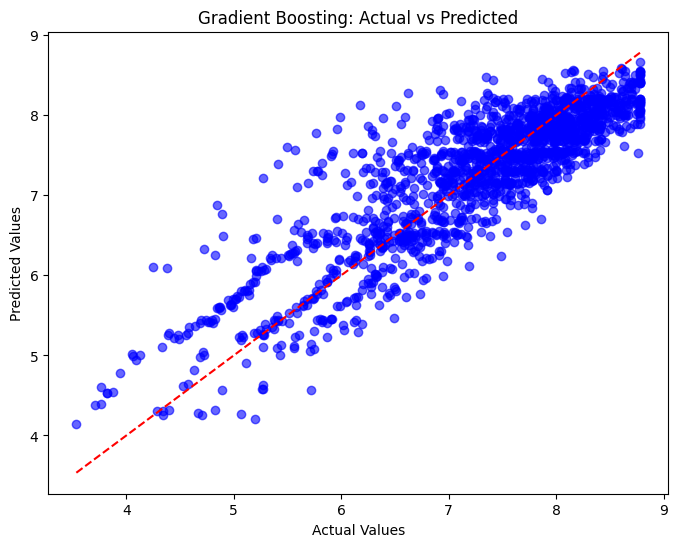

In [211]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Gradient Boosting: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Model Testing

In [212]:
df[[
'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age'
]].head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,0.282525,0,0.038399,4,0.927507,1,0,1,25
1,0.081274,1,0.048346,14,0.072068,1,2,2,15


In [213]:
# 0.282525, 0, 0.038399, 4, 0.927507, 1, 0, 1, 25
# 0.081274,	1, 0.048346, 14, 0.072068, 1, 2, 2, 15
import numpy as np

# Provided input as a feature array (scaled and preprocessed as required)
test_input = np.array([[0.282525, 0, 0.038399, 4, 0.927507, 1, 0, 1, 25]])

# Make predictions using the trained Gradient Boosting model
test_prediction = gbregressor.predict(test_input)

# Print the predicted result
print("Predicted Item Outlet Sales for the provided input:")
print(f"{test_prediction[0]:.2f}")

Predicted Item Outlet Sales for the provided input:
8.22


C:\Users\Hamza\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [214]:
import numpy as np

# Provided input as a feature array (scaled and preprocessed as required)
test_input = np.array([[0.282525, 0, 0.038399, 4, 0.927507, 1, 0, 1, 25]])
#test_input = np.array([[0.081274,	1, 0.048346, 14, 0.072068, 1, 2, 2, 15]])

# Predict the log-transformed value
log_predicted_sales = gbregressor.predict(test_input)

# Reverse the log transformation to get the original sales value
predicted_sales = np.expm1(log_predicted_sales)  # Reverse of log1p is expm1

# Print the predicted result
print("Predicted Item Outlet Sales (original scale) for the provided input:")
print(f"{predicted_sales[0]:.2f}")

Predicted Item Outlet Sales (original scale) for the provided input:
3709.34


C:\Users\Hamza\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [222]:
# Revert encoded values for categorical features to their original string labels
fat_content_map = {0: 'Low Fat', 1: 'Regular'}
item_type_map = {0: 'Dairy', 1: 'Soft Drinks', 2: 'Meat', 3: 'Fruits and Vegetables', 
                 4: 'Household', 5: 'Baking Goods', 6: 'Snack Foods', 7: 'Frozen Foods',
                 8: 'Breakfast', 9: 'Health and Hygiene', 10: 'Hard Drinks', 11: 'Canned',
                 12: 'Breads', 13: 'Starchy Foods', 14: 'Others', 15: 'Seafood'}
outlet_size_map = {0: 'Medium', 1: 'High', 2: 'Small'}
location_type_map = {0: 'Tier 1', 1: 'Tier 3', 2: 'Tier 2'}
outlet_type_map = {0: 'Supermarket Type1', 1: 'Supermarket Type2', 2: 'Grocery Store', 3: 'Supermarket Type3'}

# Example input for prediction
input_data = np.array([[0.282525, 0, 0.038399, 4, 0.927507, 1, 0, 1, 25]])

# Map the categorical encoded columns to their respective string labels for interpretability
fat_content = fat_content_map[input_data[0, 1]]
item_type = item_type_map[int(input_data[0, 3])]
outlet_size = outlet_size_map[int(input_data[0, 5])]
location_type = location_type_map[int(input_data[0, 6])]
outlet_type = outlet_type_map[int(input_data[0, 7])]

print("Interpreted Input:")
print(f"Item_Weight: {input_data[0, 0]:.2f}")
print(f"Item_Fat_Content: {fat_content}")
print(f"Item_Visibility: {input_data[0, 2]:.4f}")
print(f"Item_Type: {item_type}")
print(f"Item_MRP: {input_data[0, 4]:.2f}")
print(f"Outlet_Size: {outlet_size}")
print(f"Outlet_Location_Type: {location_type}")
print(f"Outlet_Type: {outlet_type}")
print(f"Outlet_Age: {int(input_data[0, 8])}")

# Predict the log-transformed sales using Gradient Boosting Regressor
log_predicted_sales = gbregressor.predict(input_data)

# Reverse the log transformation to get the original sales value
predicted_sales = np.expm1(log_predicted_sales)

# Display the prediction
print("\nPredicted Item Outlet Sales (original scale):")
print(f"{predicted_sales[0]:.2f}")


Interpreted Input:
Item_Weight: 0.28
Item_Fat_Content: Low Fat
Item_Visibility: 0.0384
Item_Type: Household
Item_MRP: 0.93
Outlet_Size: High
Outlet_Location_Type: Tier 1
Outlet_Type: Supermarket Type2
Outlet_Age: 25

Predicted Item Outlet Sales (original scale):
3709.34


C:\Users\Hamza\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [223]:
import pickle
pickle.dump(gbregressor,open('models/gbr.pkl','wb'))